In [58]:
import pandas as pd
import numbers as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [59]:
df=pd.read_csv('inventory_data_noisy.csv')

In [60]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [61]:
df.dtypes

Dealer_ID       object
Product_ID      object
Date            object
Quantity       float64
Consumption    float64
Location        object
dtype: object

In [62]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [63]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [64]:
import numpy as np
df['Quantity'] = df['Quantity'].replace(np.nan, df['Quantity'].median())

In [65]:
df['Consumption'] = df['Consumption'].replace(np.nan, df['Consumption'].median())

In [66]:
df['Location'] = df['Location'].replace(np.nan, df['Location'].mode()[0])
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [67]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [68]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date           410
Quantity         0
Consumption      0
Location         0
dtype: int64

In [69]:
df['Date'] = df['Date'].ffill()

In [70]:
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [71]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [72]:
df.describe()

,Date,Quantity,Consumption
count,18360,18360.000000,18360.000000
mean,2022-02-14 10:26:25.882353152,59.080120,12.933824
min,2022-01-01 00:00:00,10.000000,5.000000
25%,2022-01-23 00:00:00,32.000000,8.000000
50%,2022-02-15 00:00:00,54.000000,12.000000
75%,2022-03-08 00:00:00,77.000000,16.000000
max,2022-03-30 00:00:00,990.000000,190.000000
std,NaN,70.908248,13.280293


## 1.6 Checking for outliers

Text(0.5, 1.0, 'Distribution of Consumption')

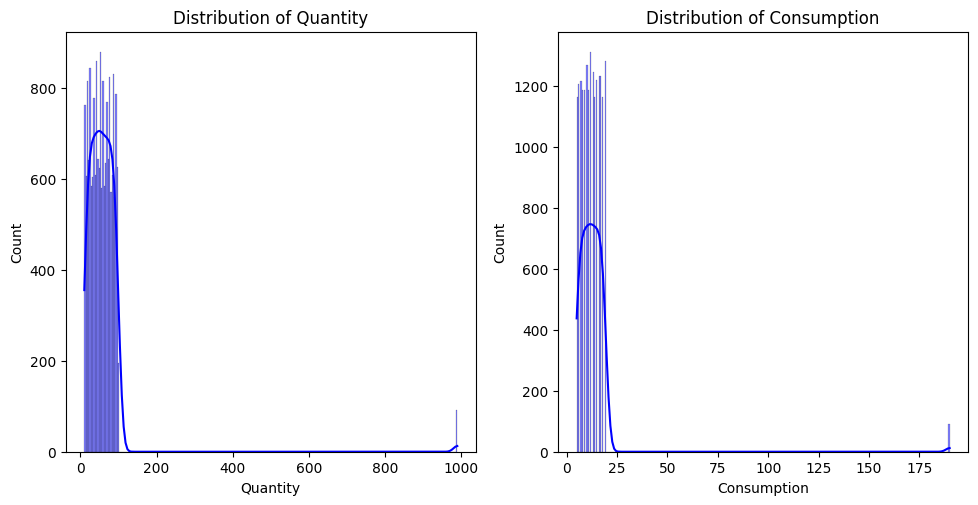

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

## Inventory Imbalance: 
-> The majority of items have low quantity and consumption, but a few have exceptionally high stock.

## Low Consumption Rate:
-> Since most consumption values are very small, this further confirms underutilization of available stock.

## Presence of Outliers:
-> These extreme values might need further investigation to understand why they exist.

Text(0.5, 1.0, 'Boxplot of Consumption')

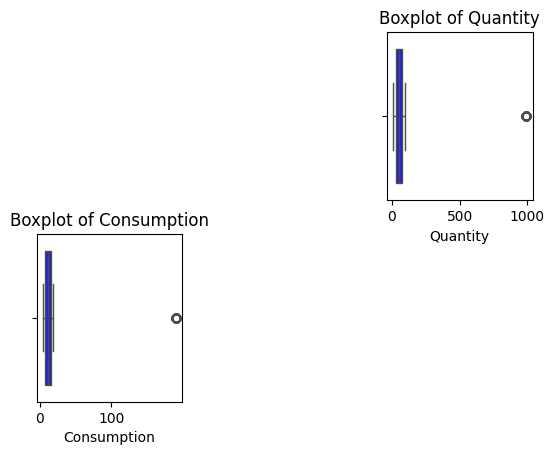

In [75]:
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

## 1.6.1 Handling ouliers using IQR(Inter Quartile Range)

In [76]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Select the columns for outlier removal (adjust as needed)
columns_to_filter = ["Quantity", "Consumption"]  
df= remove_outliers_iqr(df, columns_to_filter)




## 1.6.2  Checking if the outliers are removed successfully using histogram and boxplot

Text(0.5, 1.0, 'Distribution of Consumption')

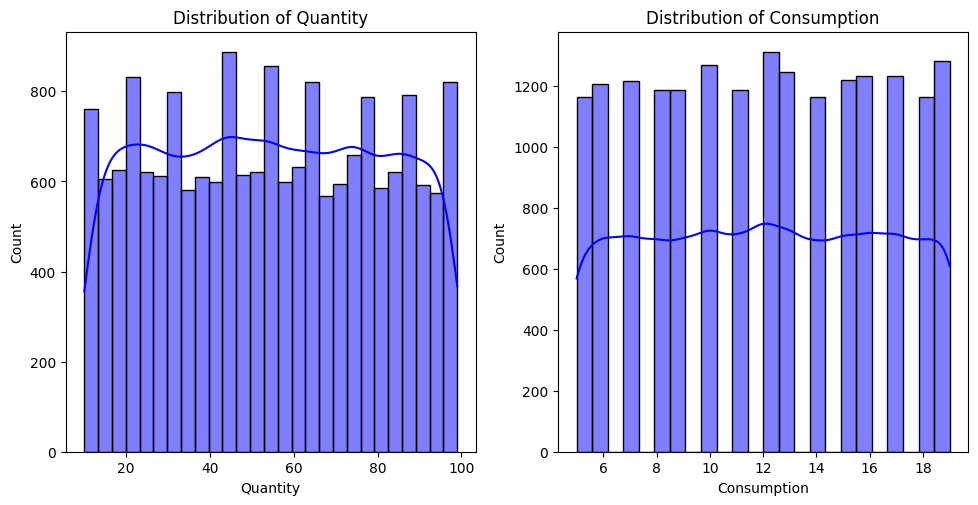

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

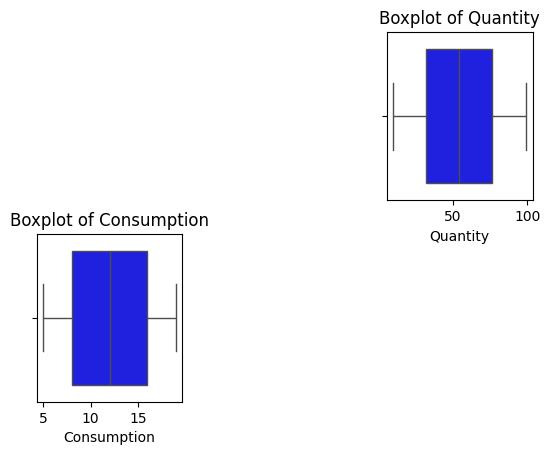

In [78]:
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

## 1.7 Categorical values present in the dataset

In [79]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(df['Location'].unique())


Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


## 1.7.1  Defining Numerical and categorical values

In [80]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Date', 'Quantity', 'Consumption']

We have 3 categorical features : ['Dealer_ID', 'Product_ID', 'Location']


## 1.7.2  Adding Consumption level column and Quantity consumption ratios

In [81]:
## Adding column requirement based on Quantity and Consumption
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [82]:
# Create a new categorical target column
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

In [83]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


## 1.8 Exploring the project
# 1.8.1 Visualize Quantity and consumption distribution to make some conclusion.
--> Histogram and Kernel Density Estimate(KDE)

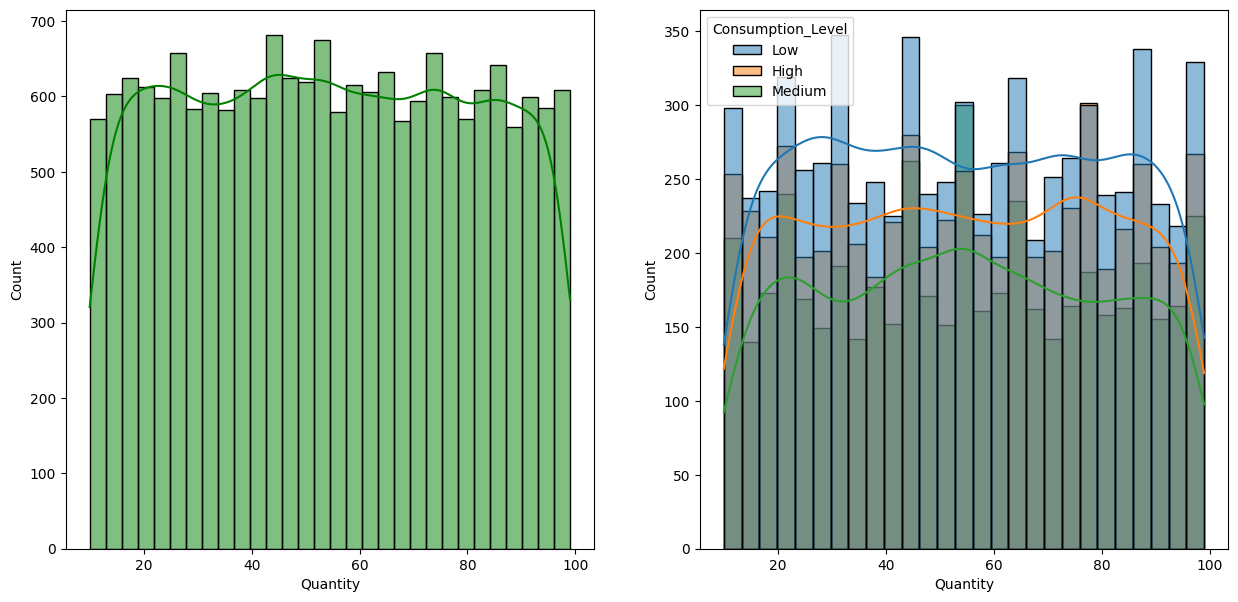

In [84]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

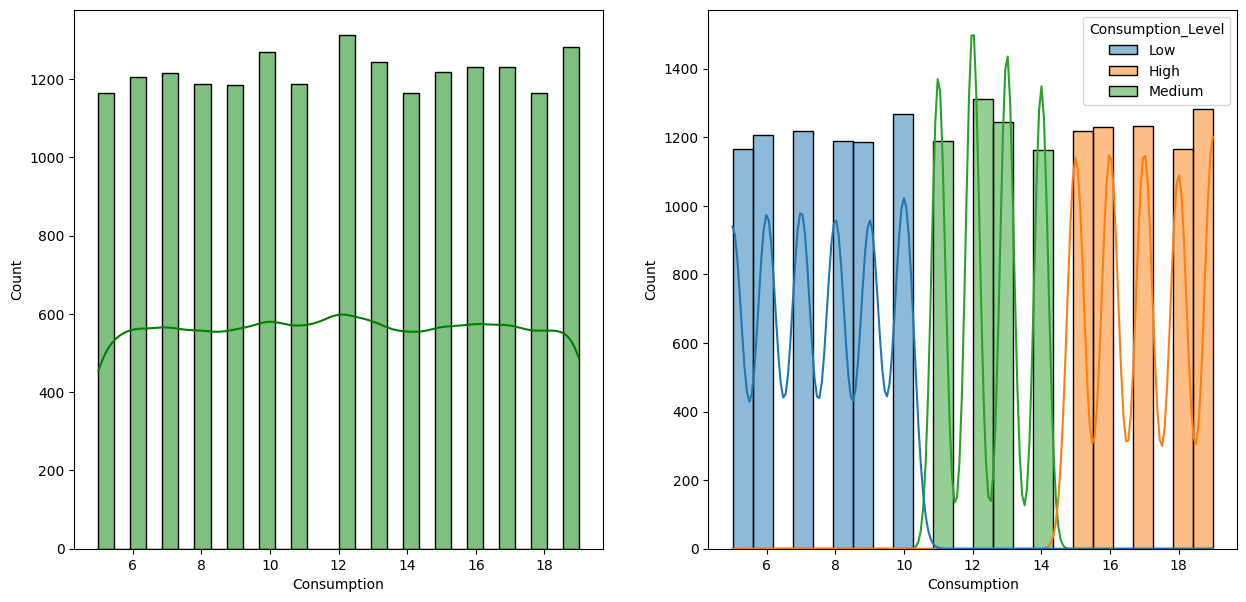

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

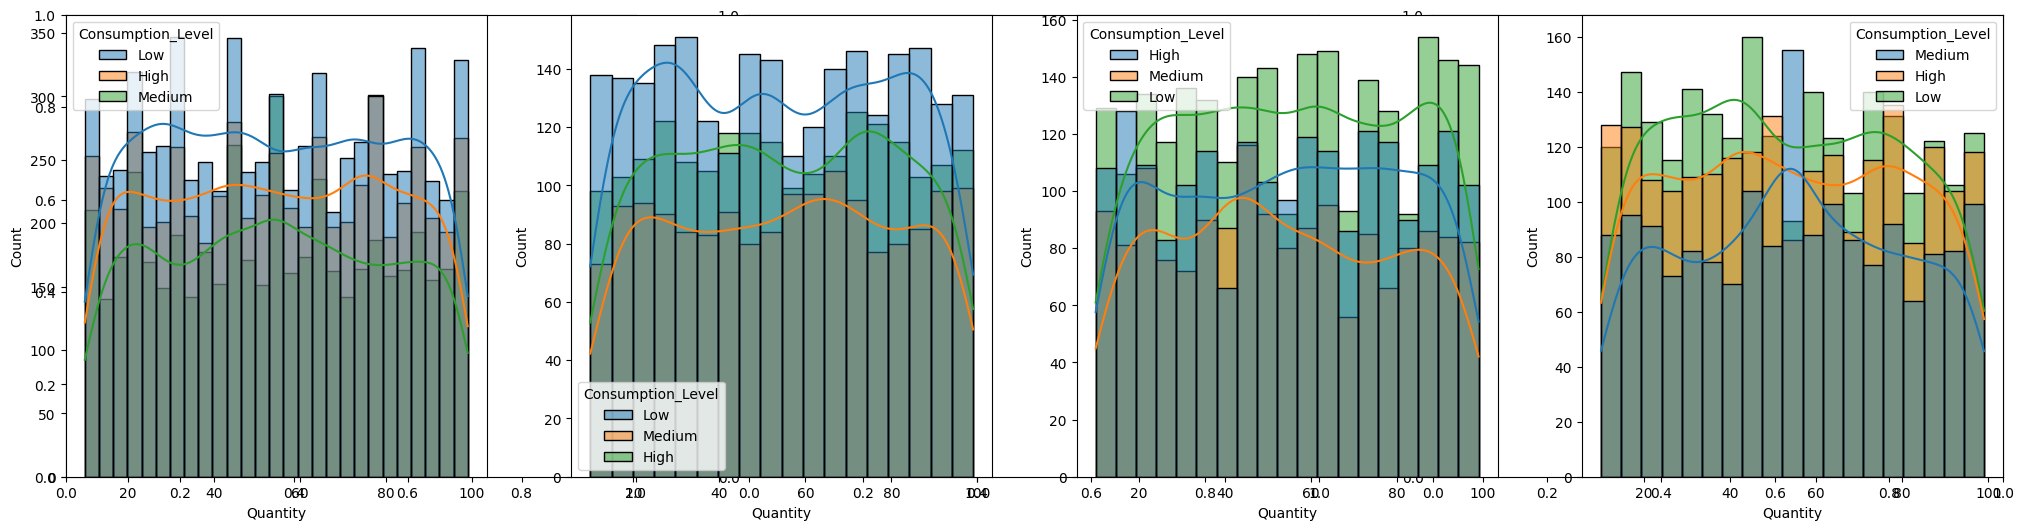

In [86]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

## 1.8.2 Multivariate analysis using pieplot

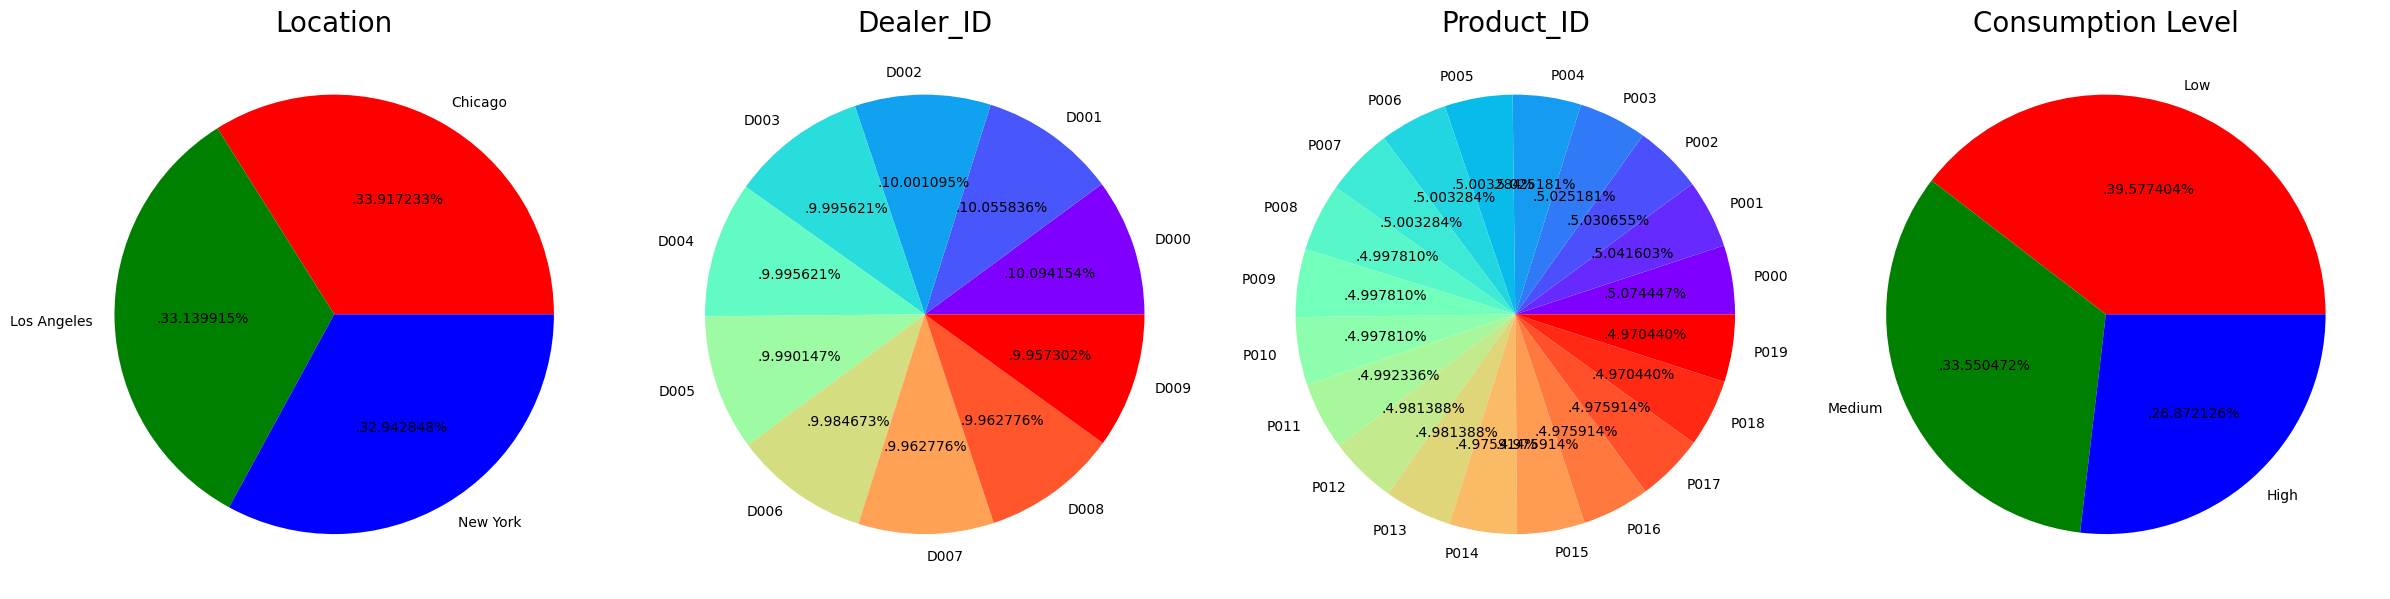

In [87]:
## Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Location'].value_counts()
labels = 'Chicago', 'Los Angeles','New York'
color = ['red','green','blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Dealer_ID'].value_counts()
labels = 'D000', 'D001','D002','D003','D004','D005','D006','D007','D008','D009'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Dealer_ID', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Product_ID'].value_counts()
labels = 'P000', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Product_ID', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Consumption_Level'].value_counts()
labels = 'Low', 'Medium','High'
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Consumption Level', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## 1.8.3 Feature Wise Visualization

#### 1.8.3.1 LOCATION COLUMN

### UNIVARIATE ANALYSIS ON LOCATION COLUMN

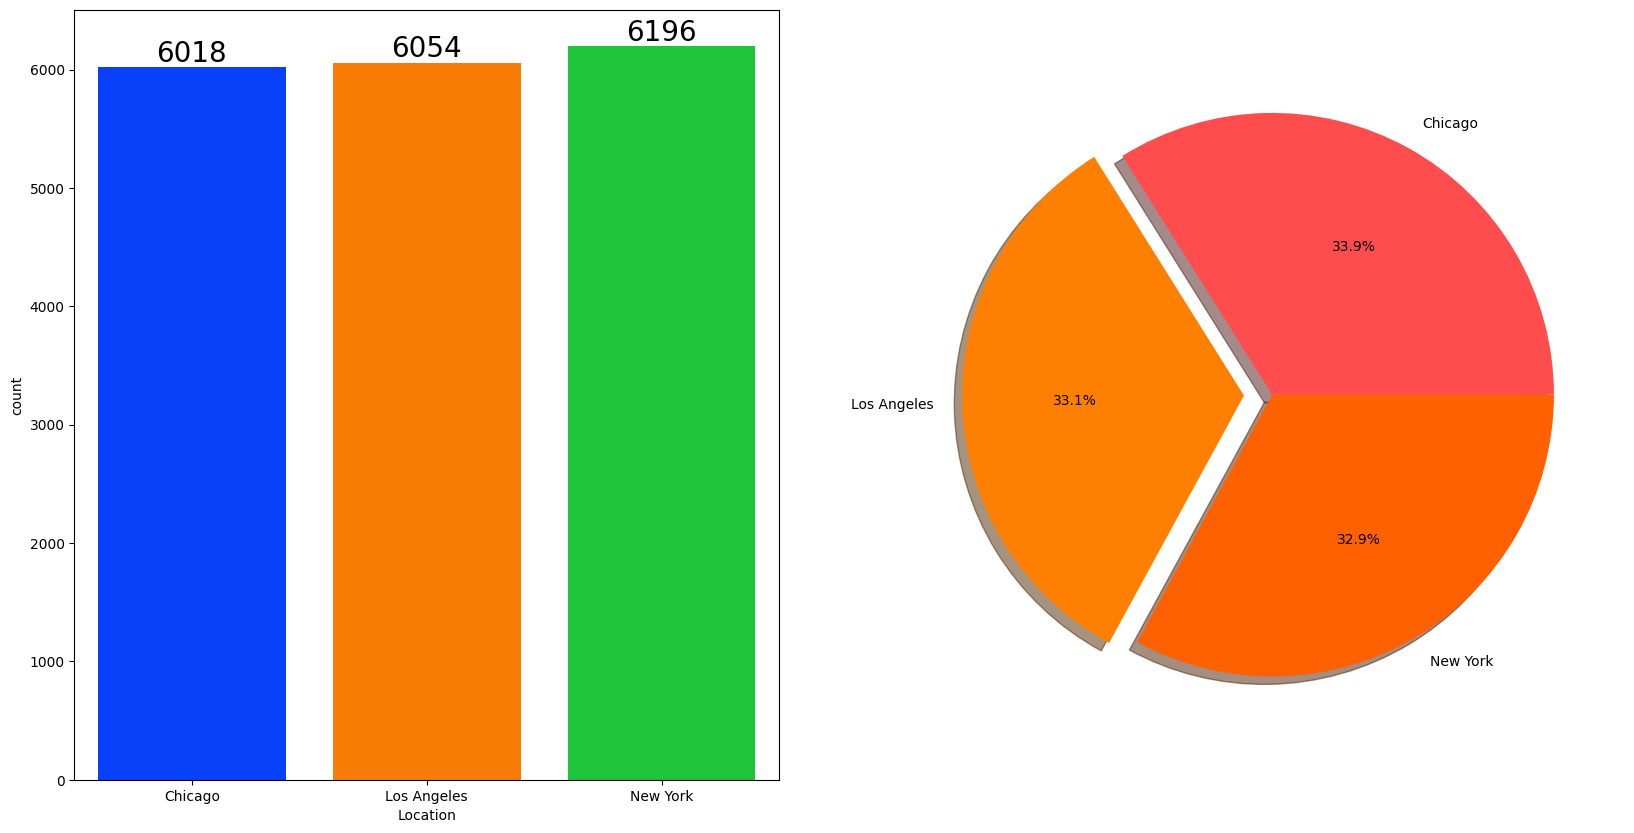

In [88]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

#### BIVARIATE ANALYSIS ( Is Location has any impact on Consumption ? )

In [89]:
location_group = df.groupby('Location')
location_group


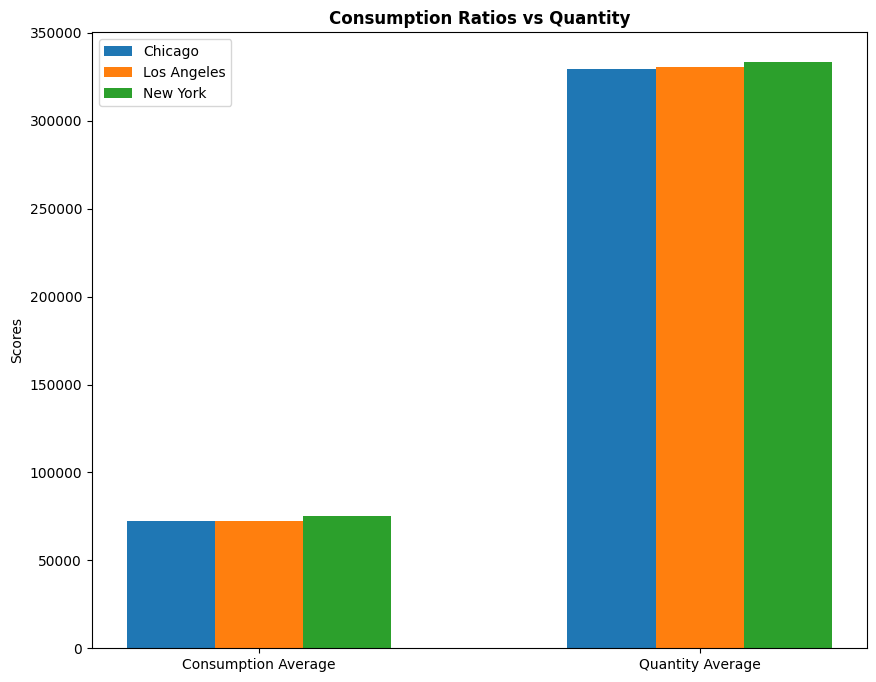

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Grouping by 'Location' and summing only the numerical columns (excluding 'Date')
numeric_columns = df.select_dtypes(include=['number']).columns
location_group = df.groupby('Location')[numeric_columns].sum()

# Make sure the cities are present in the dataset, handle missing data gracefully
cities = ['Chicago', 'Los Angeles', 'New York']
city_scores = {}

# Collecting scores for each city
for city in cities:
    if city in location_group.index:
        city_scores[city] = [
            location_group.loc[city, 'Consumption'],
            location_group.loc[city, 'Quantity']
        ]
    else:
        city_scores[city] = [0, 0]  # Set to 0 if the city is not in the dataset

# Extract the data for plotting
chicago_scores = city_scores['Chicago']
losangeles_scores = city_scores['Los Angeles']
newyork_scores = city_scores['New York']

# Plot
plt.figure(figsize=(10, 8))

X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))

# Plot the bars with proper offsets for each city
plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York')

# Set the x-axis labels and the chart's title
plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title("Consumption Ratios vs Quantity", fontweight='bold')

# Show legend and plot
plt.legend()
plt.show()


### 1.8.3.2 DEALER COLUMN
#### Univariate analysis for dealers

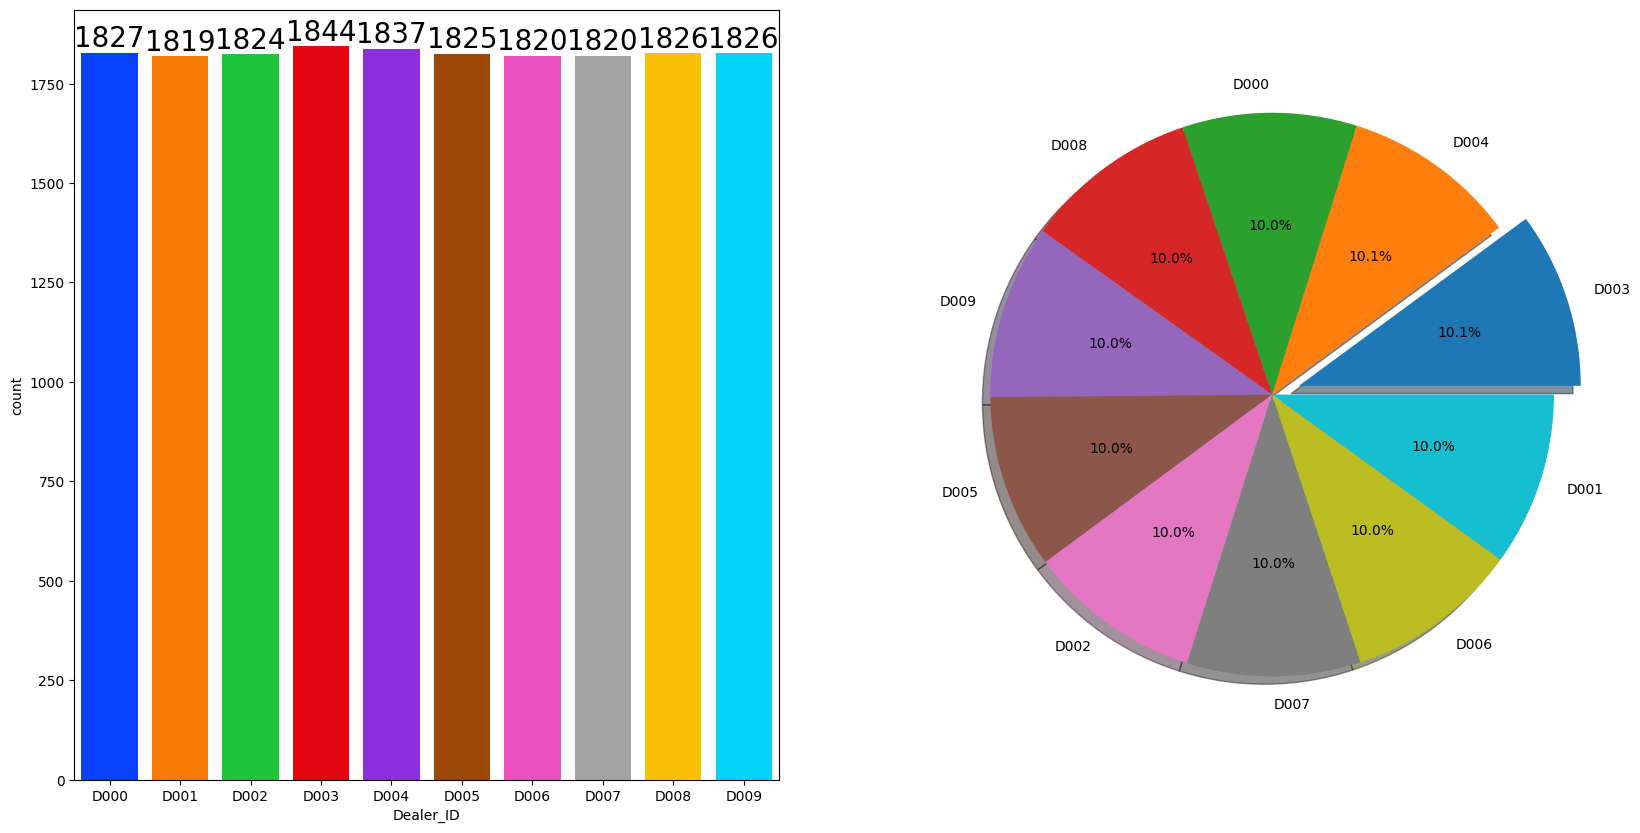

In [94]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

### BIVARIATE ANALYSIS ( Is Dealer  has any impact on consumption ? )

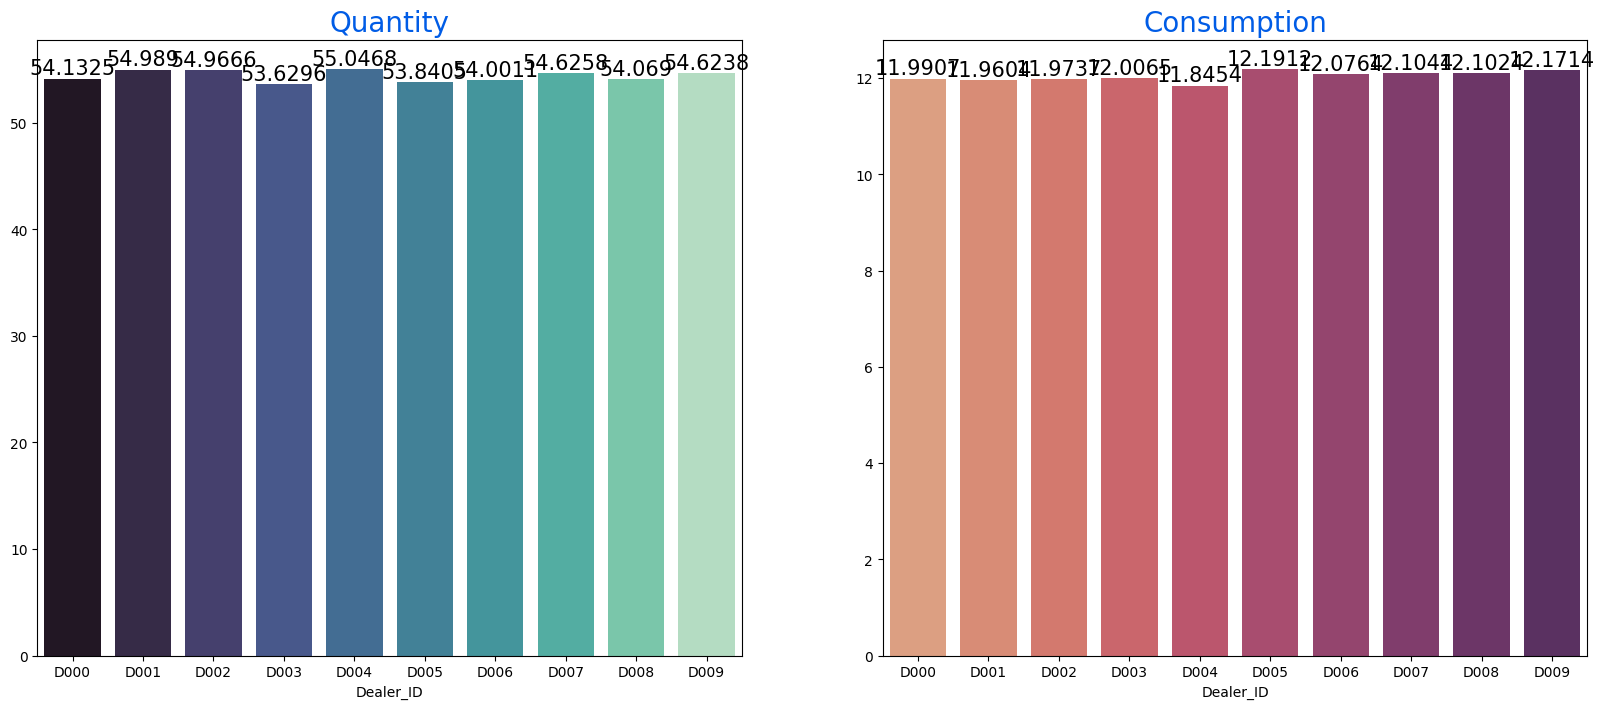

In [95]:
Group_data2=df.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


### 1.8.3.3 PRODUCT COLUMN

### UNIVARIATE ANALYSIS ( What is the most product most used? )

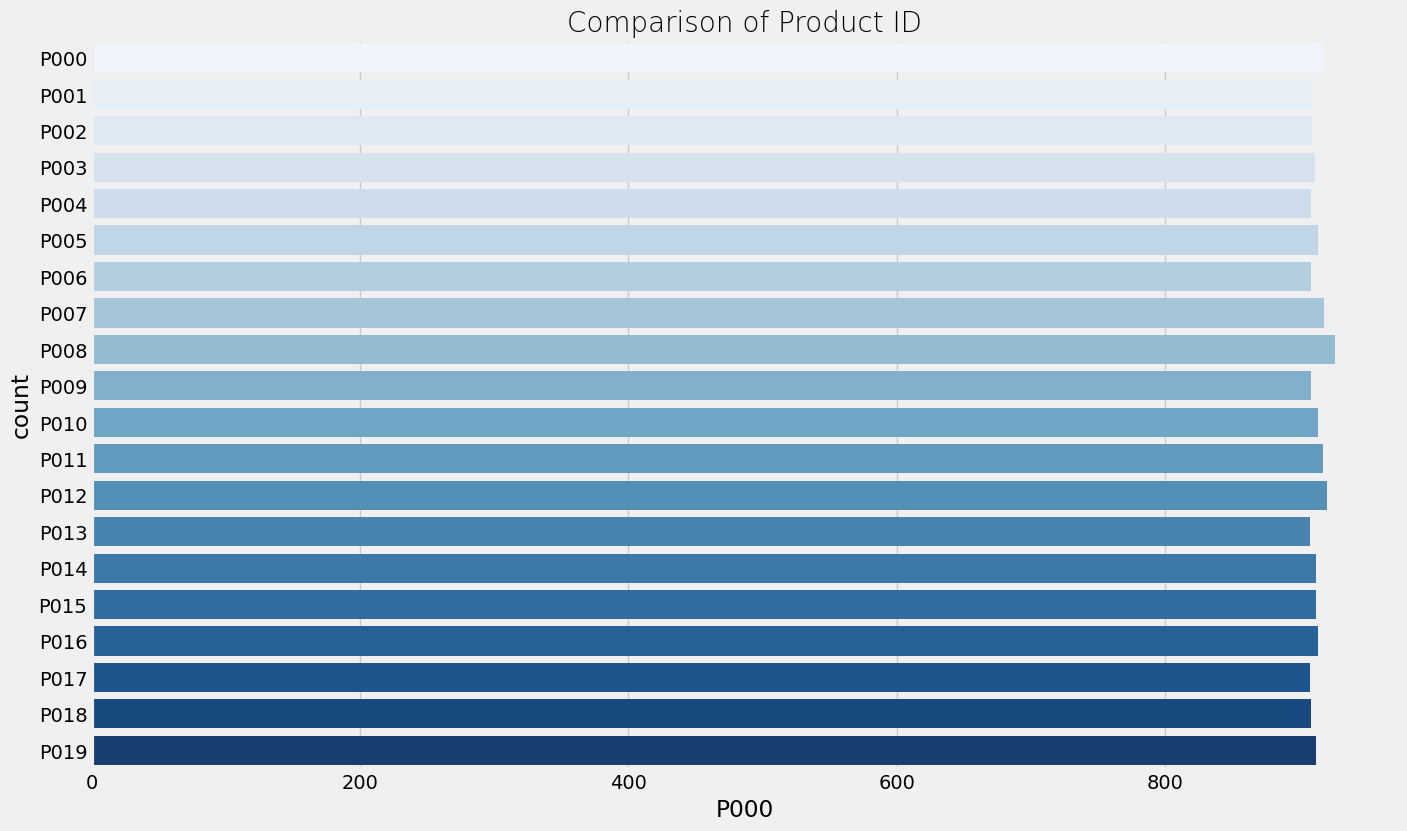

In [96]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

### BIVARIATE ANALYSIS ( Is product id  has any impact on consumption ? )

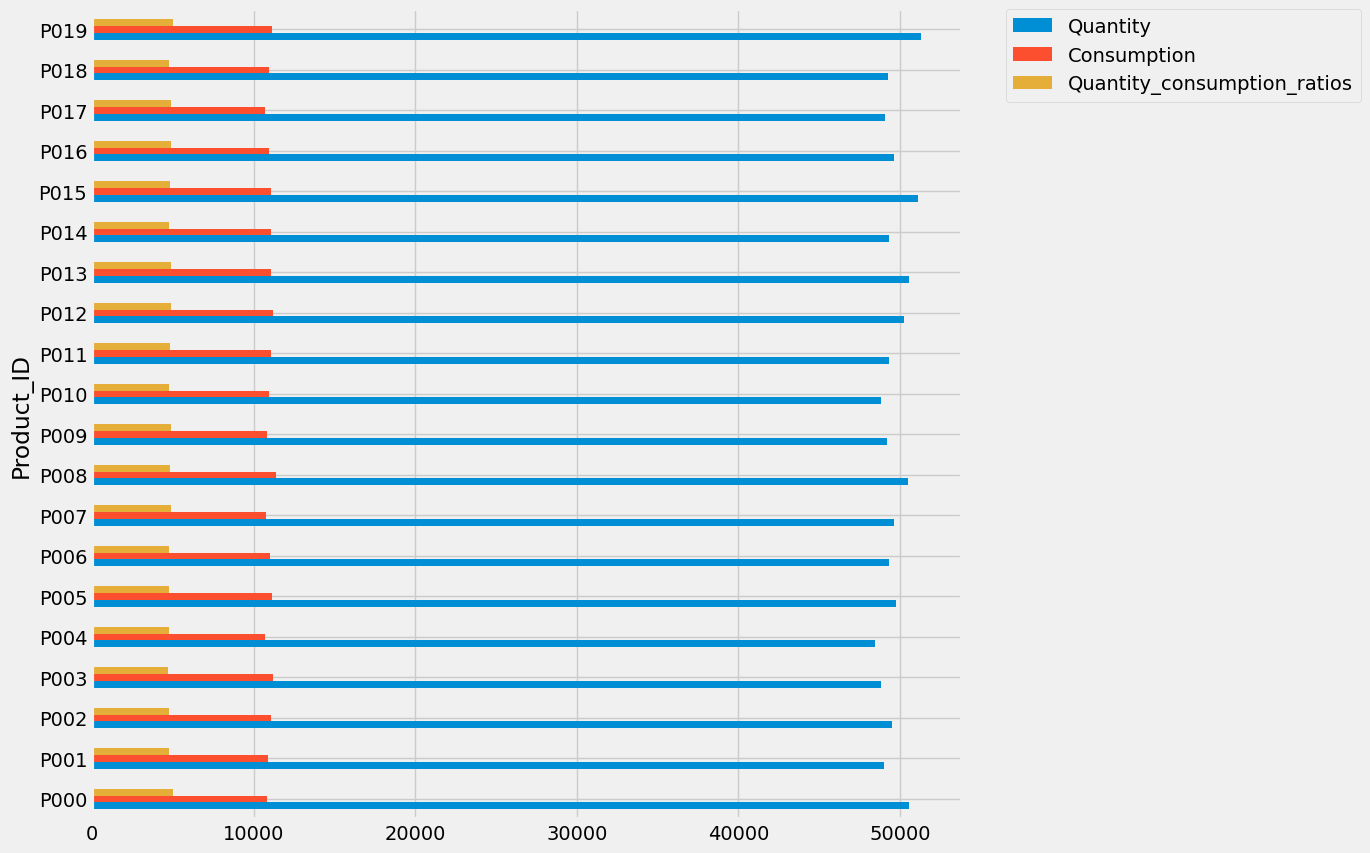

In [100]:
import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include=['number']).columns
df_grouped = df.groupby('Product_ID')[numeric_columns].agg('sum')
df_grouped.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


## Steps before model selection

1. Encoding for Categorical values
2. Standard scaling for numerical values 

In [103]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000
